# Tutorial 8: Model Development (Regression)

## Objectives

After this tutorial you will be able to:

*   Use `scikit-learn` to perform simple linear regression to predict outputs
*   Use `scikit-learn` to perform multiple linear regression to predict outputs
*   Use `scikit-learn` to perform non-linear regression to predict outputs
*   Evaluate the developed models and select the appropriate model

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import">Import dataset</a>
    </li>
    <br>
    <li>
        <a href="#reg">Regression Overview</a>
    </li>
    <br>
    <li>
        <a href="#slr">Simple Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#mlr">Multiple Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#nlr">Non-Linear Regression</a>
    </li>
    <br>
</ol>


<hr id="import">

<h2>1. Import the dataset</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Read the data from `csv` into a `Pandas DataFrame`

In [2]:
df = pd.read_csv('CO2_Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size [L],Cylinders,Transmission,Fuel Type,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Get information about the columns of the `DataFrame`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size [L]                   7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City [L/100 km]  7385 non-null   float64
 8   Fuel Consumption Hwy [L/100 km]   7385 non-null   float64
 9   Fuel Consumption Comb [L/100 km]  7385 non-null   float64
 10  Fuel Consumption Comb [mpg]       7385 non-null   int64  
 11  CO2 Emissions [g/km]              7385 non-null   int64  
dtypes: flo

In [4]:
df.describe()

,Engine Size [L],Cylinders,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<hr id="reg">

<h2>2. Regression Overview</h2>

Regression is a statistical technique used to model the relationship between one or more independent variables (also known as features or predictors) and a dependent variable (also known as the target or response variable).  
The goal of regression is to understand how changes in the independent variables affect the dependent variable. Regression is a powerful tool for prediction, forecasting, and understanding complex relationships in data.

General steps to perform regression using `scikit-learn`:

1. **Data Loading**: extract input features (x) and output target (y)
2. **Data Preprocessing (if necessary)**: prepare input features for the selected regression model
3. **Data Splitting**: split data into training data and testing data for model evaluation
4. **Model Training**: train/fit the selected regression model on the *training* data
5. **Predictions**: make prediction (y_hat) using the trained model
6. **Evaluation**: evaluate the performance of the model using appropriate metrics (i.e. MSE, R-squared)

<hr id="slr">

<h2>3. Simple Linear Regression</h2>

Simple linear regression is a statistical method that models the linear relationship between a single independent variable and a dependent variable.

The model is on the form:
$$
y = ax + b
$$

Where, 
- `a` is the slope of the independent parameter
- `b` is the intercept with the Y axis

In [5]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]']]
y = df['CO2 Emissions [g/km]']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 1) (5908,)
Testing set:  (1477, 1) (1477,)


In [6]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [36.83659295]
Intercept:  134.1542612340197


In [7]:
# make predictions
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (1477,)


In [8]:
# evaluate the model
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 929.15
Coefficient of determination (R-squared): 0.72


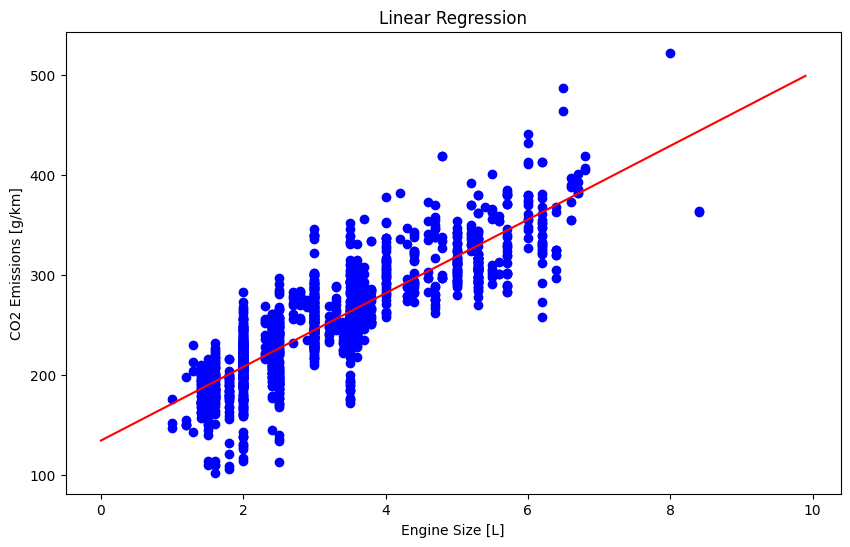

In [9]:
# visualize the model fit
x_fit = np.arange(0.0, 10.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_fit, y_fit, color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size [L]')
plt.ylabel('CO2 Emissions [g/km]')
plt.show()

<hr id="mlr">

<h2>4. Multiple Linear Regression</h2>

Multiple linear regression is an extension of simple linear regression that allows for the inclusion of multiple independent variables. It assumes that the relationship between the dependent variable and the independent variables is linear and additive, meaning that the effect of each independent variable on the dependent variable is independent of the other independent variables.

The model is on the form:
$$
y = a_0 +  a_1x_1 + a_2x_2 + ...
$$

Where,
- `a_0` is the intercept with the Y axis
- `a_1, a_2, ...` is the slope of each independent parameter

In [10]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [11]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [12.99410637 13.61461223]
Intercept:  60.16729207442896


In [12]:
# make predictions
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (1477,)


In [13]:
# evaluate the model
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 443.19
Coefficient of determination (R-squared): 0.87


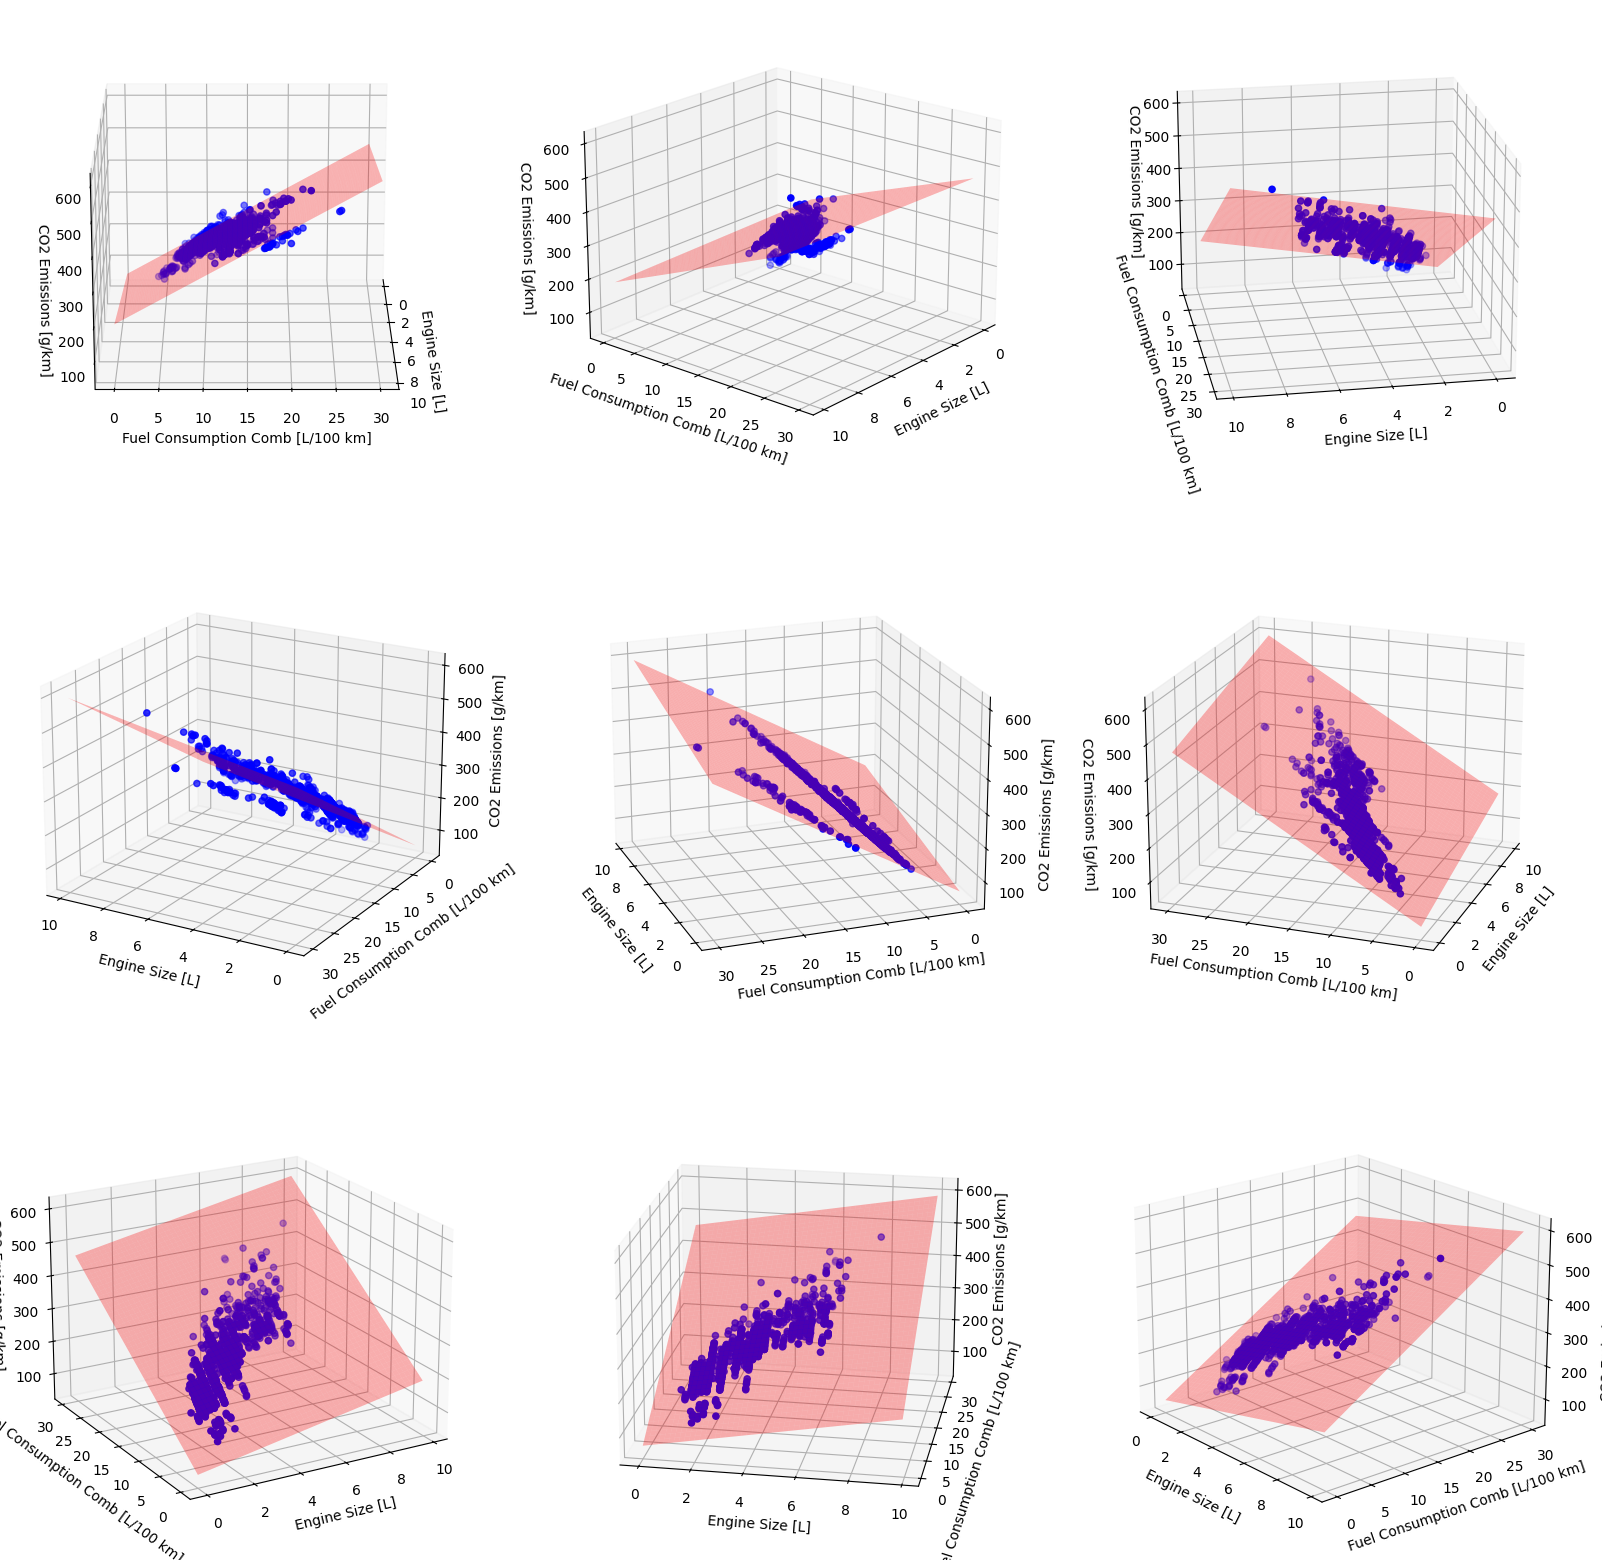

In [14]:
# visualize the model fit
x_fit = np.arange(0.0, 10.0, 0.1)
y_fit = np.arange(0.0, 30.0, 0.1)
X, Y = np.meshgrid(x_fit, y_fit)
Z = lr.intercept_ + lr.coef_[0] * X + lr.coef_[1] * Y
fig = plt.figure(figsize=(20, 20))

# create 3D subplot
n_rows = 3
n_cols = 3
angles = np.linspace(0, 360, n_rows * n_cols + 1)[:-1]
for i, angle in enumerate(angles):
    ax = fig.add_subplot(n_rows, n_cols, i + 1, projection='3d')
    ax.scatter(x_test['Engine Size [L]'], x_test['Fuel Consumption Comb [L/100 km]'], y_test, color='blue')
    ax.plot_surface(X, Y, Z, color='red', alpha=0.3)
    ax.set_xlabel('Engine Size [L]')
    ax.set_ylabel('Fuel Consumption Comb [L/100 km]')
    ax.set_zlabel('CO2 Emissions [g/km]')
    ax.view_init(20, angle)

plt.show()

<hr id="nlr">

<h2>5. Non-Linear Regression</h2>

Non-linear regression is a statistical method that models the relationship between a single or multiple independent variables and a dependent variable when the relationship is not linear.  
Non-linear regression techniques can capture more complex relationships between variables than linear regression methods.  
Some common non-linear regression techniques include polynomial regression, support vector regression (SVR), decision tree regression, and neural networks.

For different non-linear equations (e.g. polynomial, exponential, etc.). It is common to linearize the equation, then perform linear regression on the linearized equation using the `LinearRegression()` model.

For example, for a polynomial of the second degree:
$$
y = a_0 + a_1x + a_2x^2
$$
This can be linearized as follows:
$$
y = a_0 + a_1x_1 + a_2x_2
$$
Where,
$$ 
x_1 = x  \\
x_2 = x^2
$$

In [15]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]']]
y = df['CO2 Emissions [g/km]']

# create polynomial features
# automatically creates new columns for x^2, x^3, x^4, ... calculated from the input variable x
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (7385, 2)
Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [16]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [54.81843451 -2.4406146 ]
Intercept:  106.03152589504862


In [17]:
# make predictions
y_pred = lr.predict(x_test)
print('Predictions: ', y_pred.shape)

Predictions:  (1477,)


In [18]:
# evaluate the model
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (R-squared): {:.2f}'.format(r2_score(y_test, y_pred)))

Mean squared error: 954.69
Coefficient of determination (R-squared): 0.73


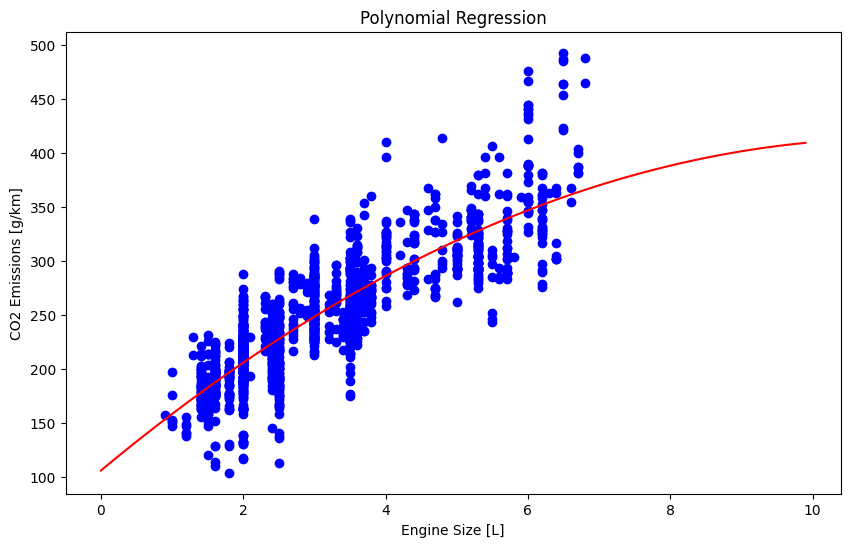

In [19]:
# visualize the model fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue')
x_fit = np.arange(0.0, 10.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit + lr.coef_[1] * x_fit ** 2
plt.plot(x_fit, y_fit, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Engine Size [L]')
plt.ylabel('CO2 Emissions [g/km]')
plt.show()

We typically try multiple models and different combinations of parameters and select the most accurate based on the evaluation metrics above.

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>
<br>
<a href="https://www.kaggle.com/datasets/mrmorj/car-fuel-emissions">CO2 emissions dataset (kaggle.com)</a>